In [2]:
import pandas as pd
from scipy import misc
from scipy.misc import imread as imr
import matplotlib.pyplot as plt
from random import randint
import tensorflow as tf
sess = tf.InteractiveSession()
from numpy import reshape
import numpy as np
from time import time
sample_size = 100
%matplotlib inline

# 21 Labeled Paintings
# 9 not Raphel's all *JPG
# 12 Raphel's -- 2 *JPG 10 *TIFF
# All unlabeled Paintings TIFF

In [3]:
# 1. #(TIF) Maybe Raphael - Disputed\
# 2. (TIF) Raphael\
# 3. (TIF) Raphael\
# 4. (TIF) Raphael\
# 5. (TIF) Raphael\
# 6. (TIF) Raphael\
# 7. #(TIF) Maybe Raphael - Disputed\
# 8. (TIF) Raphael\
# 9. (TIF) Raphael\
# 10. #(TIF) Maybe Raphael - Disputed\
# 11. (JPG) Not Raphael\
# 12. (JPG) Not Raphael\
# 13. (JPG) Not Raphael\
# 14. (JPG) Not Raphael\
# 15. (JPG) Not Raphael\
# 16. (JPG) Not Raphael\
# 17. (JPG) Not Raphael\
# 18. (JPG) Not Raphael\
# 19. (JPG) Not Raphael\
# 20. #(TIF) My Drawing (Raphael?)\
# 21. (JPG) Raphael\
# 22. (JPG) Raphael\
# 23. #(TIF) Maybe Raphael - Disputed\
# 24. (TIF) Raphael\
# 25. #(TIF) Maybe Raphael - Disputed\
# 26. #(TIF) Maybe Raphael - Disputed\
# 27. (TIF) Raphael\
# 28. (TIF) Raphael\

In [38]:
rapheal = [np.array(imr('2. 202x216.TIF')[:, :, :3] > 200, dtype = 'float32'), 
          np.array(imr('3. 272x369.TIF')[:, :, :3] > 200, dtype = 'float32'), 
          np.array(imr('4. 363x189.tiff')[:, :, :3] > 200, dtype = 'float32'), 
          np.array(imr('5. 379x281.tiff')[:, :, :3] > 200, dtype = 'float32'),
          np.array(imr('6. 197x168.tiff')[:, :, :3] > 200, dtype = 'float32'),
          np.array(imr('8. 329x232.tif')[:, :, :3] > 200, dtype = 'float32'),
          np.array(imr('9. 279x187.tif')[:, :, :3] > 200, dtype = 'float32'),
          np.array(imr('21. 203x258.TIF')[:, :, :3] > 200, dtype = 'float32'),
          np.array(imr('22. 257x375.TIF')[:, :, :3] > 200, dtype = 'float32'),
          np.array(imr('27. 278x419.tiff')[:, :, :3] > 200, dtype = 'float32'),
          #imr('28. 267x264.TIF') Image too large to read
         ]# Image 24 left out for validation purpose
notrapheal = [np.array(imr('11. 394x248.TIF')[50: 4680, 70: 2900] > 200, dtype = 'float32'),
             np.array(imr('12. 305x492.TIF') > 200, dtype = 'float32'),
             np.array(imr('13. 206x184.TIF')[90: 4780, 80: 4230] > 200, dtype = 'float32'),
             np.array(imr('14. 279x152.TIF')[65: 4930, 80: 2680] > 200, dtype = 'float32'),
             np.array(imr('16. 335x476.TIF') > 200, dtype = 'float32'),
             np.array(imr('17. 283x300.TIF')[1100: 3580, 180:2830] > 200, dtype = 'float32'),
             np.array(imr('18. 217x278.TIF')[90: 4560, 110: 5870] > 200, dtype = 'float32'),
             np.array(imr('19. 283x191.TIF') > 200, dtype = 'float32')
             ]# Image 15 left out for validation purpose
Disputed = [np.array(imr('1. 185x354.TIF')[:, :, :3] > 200, dtype = 'float32'),
            np.array(imr('7. 243x413 .tiff')[:, :, :3] > 200, dtype = 'float32'),
           np.array(imr('10. 269x227.TIF')[:, :, :3] > 200, dtype = 'float32'),
           np.array(imr('20. 135x390.tif')[:, :, :3] > 200, dtype = 'float32'),
           np.array(imr('23. 84x68.tif') [:, :, :3] > 200, dtype = 'float32'),
           np.array(imr('25. 156x115.tif')[:, :, :3] > 200, dtype = 'float32'),
           np.array(imr('26. 197x187.tif')[:, :, :3] > 200, dtype = 'float32')]
test1 = [np.array(imr('24. 203x224.tif')[:, :, :3] > 200, dtype = 'float32')]
test0 = [np.array(imr('15. 279x152.TIF')[50:6000, 50:3400] > 200, dtype = 'float32')]

In [6]:
print 'Positive:', len(rapheal), 'Negative:', len(notrapheal), 'Unknown:', len(Disputed)

Positive: 10 Negative: 8 Unknown: 6


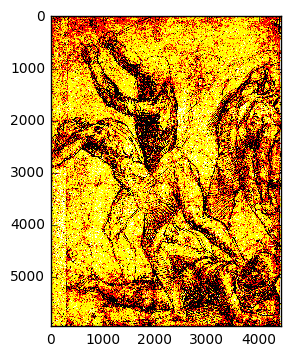

In [7]:
plt.imshow(rapheal[3]> 0)

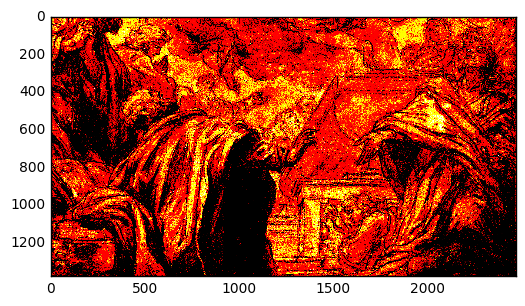

In [8]:
plt.imshow(notrapheal[5][1100: 3580, 180:2830])

In [34]:
nopic = 0
def randomsample(label):
    if label == 1:
        no_painting = randint(0,9)
        shape = rapheal[no_painting].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return rapheal[no_painting][starting1: starting1+sample_size, 
                                 starting2: starting2+sample_size]

    elif label == 0:
        no_painting = randint(0,7)
        shape = notrapheal[no_painting].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return notrapheal[no_painting][starting1: starting1+sample_size,
                                    starting2: starting2+sample_size]
    
    elif label == 'test0':
        shape = test0[0].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return test0[0][starting1: starting1+sample_size,
                                starting2: starting2+sample_size]
    
    elif label == 'test1':
        shape = test1[0].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return test1[0][starting1: starting1+sample_size,
                                starting2: starting2+sample_size]
    elif label == 'Disputed':
        shape = Disputed[nopic].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return Disputed[nopic][starting1: starting1+sample_size,
                                    starting2: starting2+sample_size]
    elif label == 'Rapheal':
        shape = rapheal[nopic].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return rapheal[nopic][starting1: starting1+sample_size,
                                    starting2: starting2+sample_size]
    elif label == 'notRapheal':
        shape = notrapheal[nopic].shape
        starting1 = randint(0, shape[0]-sample_size)
        starting2 = randint(0, shape[1]-sample_size)
        return notrapheal[nopic][starting1: starting1+sample_size,
                                    starting2: starting2+sample_size]

    

    else:
        raise 'Input not recognized', label

In [10]:
def samplemany(number):
    start = time()
    sample = []
    label = []
    for i in range(number):
        a = randint(0,1)
        sample.append(randomsample(a))
        if a:
            label.append(np.array([1], dtype = 'float32'))
        else:
            label.append(np.array([0], dtype = 'float32'))
    return sample, label

In [11]:
def sample_test(__label):
    if __label:
        tag = 'test1'
    else:
        tag = 'test0'
    sample = []
    label = []
    for i in range(20):
        sample.append(randomsample(tag))
        if __label:
            label.append(np.array([1], dtype = 'float32'))
        else:
            label.append(np.array([0], dtype = 'float32'))
    return sample, label

In [12]:
def sample_disputed(num):
    sample = []
    for i in range(50):
        sample.append(randomsample('Disputed'))
    

# Sample data

In [13]:
#pd.DataFrame([randomsample(0), randomsample(1)], columns = range(30000) + ['label'])

In [14]:

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)



In [15]:
x = tf.placeholder(tf.float32, shape = [None, sample_size, sample_size, 3])
y_ = tf.placeholder(tf.float32, shape = [None, 1])

In [16]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [17]:
W_conv1 = weight_variable([10, 10, 3, 8])
b_conv1 = bias_variable([8])

In [18]:
h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [19]:
W_conv2 = weight_variable([10, 10, 8, 32])
b_conv2 = bias_variable([32])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


In [20]:
W_fc1 = weight_variable([sample_size/4 * sample_size/4 * 32, 128])
b_fc1 = bias_variable([128])

h_pool2_flat = tf.reshape(h_pool2, [-1, sample_size/4*sample_size/4*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [21]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [22]:
W_fc2 = weight_variable([128, 1])
b_fc2 = bias_variable([1])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [23]:
sess.run(tf.global_variables_initializer())

In [24]:
cross_entropy = tf.reduce_mean(
    tf.abs(y_ - y_conv))
train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)
# correct_prediction = tf.equal(y_conv, y_)
Loss = tf.abs(y_ - y_conv)
accuracy = tf.reduce_mean(tf.cast(Loss, tf.float32))
sess.run(tf.global_variables_initializer())
batch_size = 50

In [25]:
cum = 0

while True:
    sess.run(tf.global_variables_initializer())
    
    sample_size = 100
    data, label = samplemany(5000)
    test1, test1_label = sample_test(1)
    test0, test0_label = sample_test(0)
    for i in xrange(0, 5000, batch_size):
        
        train_step.run(feed_dict={x: data[i: i+batch_size], y_: label[i: i+batch_size], keep_prob: 0.5})
        train_label = randint(0,1)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x:data[i: i +batch_size], y_: label[i: i+batch_size], keep_prob: 1.0})
            print("step %d, training loss %g,"%(i,train_accuracy))
            test0_accuracy = accuracy.eval(feed_dict={
                x: test0, y_: test0_label, keep_prob: 1.0})
            test1_accuracy = accuracy.eval(feed_dict={
                x: test1, y_: test1_label, keep_prob: 1.0})
            print("step %d, testing loss %g, %g,"%(i,test0_accuracy, test1_accuracy))
        if test0_accuracy + test1_accuracy < 0.5:
            cum = cum + 1
        else: 
            cum = 0
        if cum > 1:
            break
    else:
        continue
    break

        

    # print("test accuracy %g"%accuracy.eval(feed_dict={
    #     x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


step 0, training loss 3.46062,
step 0, testing loss 5.58657, 3.05314,
step 100, training loss 2.87617,
step 100, testing loss 5.37726, 2.91033,
step 200, training loss 2.85261,
step 200, testing loss 3.76522, 2.74247,
step 300, training loss 4.13809,
step 300, testing loss 2.95663, 3.34614,
step 400, training loss 2.37007,
step 400, testing loss 2.58649, 3.09797,
step 500, training loss 2.25722,
step 500, testing loss 2.55384, 2.35377,
step 600, training loss 1.8049,
step 600, testing loss 2.44522, 2.07876,
step 700, training loss 2.07388,
step 700, testing loss 2.26465, 1.94117,
step 800, training loss 1.9452,
step 800, testing loss 2.34341, 1.83073,
step 900, training loss 1.61492,
step 900, testing loss 1.87167, 1.68002,
step 1000, training loss 1.60435,
step 1000, testing loss 1.74238, 2.19571,
step 1100, training loss 1.92456,
step 1100, testing loss 1.82321, 2.58346,
step 1200, training loss 1.84632,
step 1200, testing loss 1.75535, 2.59633,
step 1300, training loss 1.26906,
step

In [77]:
def validate_disputed(categ, a):
    sample = []
    if a:
        nopic = a
    for i in range(20):
        sample.append(randomsample(categ))
    fitted_y = y_conv.eval(feed_dict={x : sample, keep_prob :1.0})
    
    if np.mean(fitted_y) < 0.25:
        print 'Picture', a,'FAKE'
    elif np.mean(fitted_y) <0.5:
        print 'Picture', a,'Probably FAKE'
    elif np.mean(fitted_y) <0.75:
        print 'Picture', a,'Probably Genuine'
    else:
        print 'Picture', a,'Genuine'
    
    return np.mean(fitted_y)

In [135]:
for i in range (7):
    validate_disputed('Disputed', i)

Picture 0 Genuine
Picture 1 Probably Genuine
Picture 2 Probably FAKE
Picture 3 Genuine
Picture 4 Probably FAKE
Picture 5 Probably Genuine
Picture 6 Genuine


In [104]:
for i in range (9):
    validate_disputed('Rapheal', i)

Picture 0 Probably FAKE
Picture 1 Probably Genuine
Picture 2 Genuine
Picture 3 Probably Genuine
Picture 4 Probably FAKE
Picture 5 Genuine
Picture 6 Probably FAKE
Picture 7 Probably Genuine
Picture 8 Genuine


In [100]:
for i in range(7):
    validate_disputed('notRapheal', i)

Picture 0 FAKE
Picture 1 Probably FAKE
Picture 2 FAKE
Picture 3 FAKE
Picture 4 FAKE
Picture 5 Probably FAKE
Picture 6 Probably FAKE
